<a href="https://colab.research.google.com/github/alaa450/Visualizing_Filters_of_a_CNN_model/blob/main/KerasTuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import kerastuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda

<ipython-input-3-fdd3d342b4c0>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[32756 11377 32951 16767 12506]


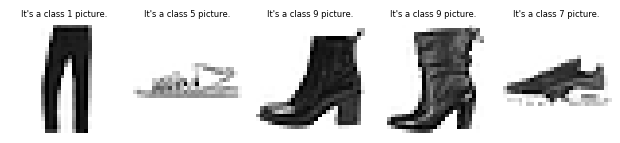

In [5]:
random_indices = np.random.randint(len(X_train), size = 5)
print(random_indices)
random_images = X_train[random_indices]
random_output = y_train[random_indices]
plt.figure(figsize=(10,10))
for index in range(5):
     plt.subplot(1,8,index+1)
     plt.imshow(random_images[index], cmap= 'binary')
     plt.title ("It's a class " + str(random_output[index]) +  " picture.",fontdict={'fontsize': 6})
     plt.axis("off")
plt.tight_layout()
plt.show()

In [8]:
def my_model(hp):
  num_hidden_layers = 2
  num_hidden_units = 16
  dropout_rate = 0.1
  lr = 0.01

  if hp:
    num_hidden_layers = hp.Choice('num_hidden_layers', values=[1,2,3])
    num_hidden_units = hp.Choice('num_hidden_units', values=[16,32,64])
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5)
    lr = hp.Float('lr', min_value=0.001, max_value=0.01)
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Lambda(lambda x: x / 255.0))

  for i in range(num_hidden_layers):
    model.add(Dense(num_hidden_units, activation='relu'))
    model.add(Dropout(dropout_rate))


  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer= Adam(learning_rate = lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [18]:
class CustomTuner(kt.tuners.BayesianOptimization):
  def run_trial(self, trial, *args,**kwargs):
    kwargs['batch_size'] = trial.hyperparameters.Int('batch_size', 32, 128, step=32)
    returned_value = super(CustomTuner,self).run_trial(trial,*args,**kwargs)
    return returned_value

tuner= CustomTuner(my_model, objective ='val_accuracy', max_trials=20,
                   directory='logs',project_name='fashion_mnist', overwrite=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_hidden_layers (Choice)
{'default': 1, 'conditions': [], 'values': [1, 2, 3], 'ordered': True}
num_hidden_units (Choice)
{'default': 16, 'conditions': [], 'values': [16, 32, 64], 'ordered': True}
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': None, 'sampling': 'linear'}
lr (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.001, 'max_value': 0.01, 'step': None, 'sampling': 'linear'}


In [20]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose= False)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `inpu

In [21]:
tuner.results_summary()

Results summary
Results in logs/fashion_mnist
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 15 summary
Hyperparameters:
num_hidden_layers: 1
num_hidden_units: 64
dropout_rate: 0.1
lr: 0.001
batch_size: 128
Score: 0.8709999918937683

Trial 16 summary
Hyperparameters:
num_hidden_layers: 3
num_hidden_units: 64
dropout_rate: 0.1
lr: 0.001
batch_size: 32
Score: 0.8679999709129333

Trial 14 summary
Hyperparameters:
num_hidden_layers: 3
num_hidden_units: 64
dropout_rate: 0.18894732488628085
lr: 0.004239911467955035
batch_size: 128
Score: 0.8561000227928162

Trial 17 summary
Hyperparameters:
num_hidden_layers: 1
num_hidden_units: 64
dropout_rate: 0.1
lr: 0.010000000000000002
batch_size: 96
Score: 0.8536999821662903

Trial 10 summary
Hyperparameters:
num_hidden_layers: 1
num_hidden_units: 64
dropout_rate: 0.39646285072392495
lr: 0.004538636321650285
batch_size: 128
Score: 0.8521999716758728

Trial 19 summary
Hyperparameters:
num_hidden_layers: 1
num_hidden_units: